<a href="https://colab.research.google.com/github/Jake0925/DeepLearning/blob/master/10_2_Mnist_SoftMax_relu_%EC%A2%80%EB%8D%94%EA%B9%8A%EC%9D%80%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/hunkim/DeepLearningZeroToAll/blob/master/tf2/tf2-10-2-mnist_nn.py

In [1]:
import numpy as np
import random
import tensorflow as tf

random.seed(777)  # for reproducibility
learning_rate = 0.001
batch_size = 100
training_epochs = 15
nb_classes = 10

(x_train, y_train), (x_test2, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)

x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test2.reshape(x_test2.shape[0], 28 * 28)

y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(input_dim=784, units=256, activation='relu')) # 입력층이 784개이다(이미지크기 28x28), 출력층은 사용자가 정한 256개이다
tf.model.add(tf.keras.layers.Dense(units=256, activation='relu'))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, activation='softmax')) # 최종출력은 classification갯수이 10개
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

tf.model.fit(x_train, y_train, batch_size=batch_size, epochs=training_epochs)

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
600/600 [==============================] - 8s 11ms/step - loss: 2.3546 - accuracy: 0.8956
Epoch 2/15
600/600 [==============================] - 8s 13ms/step - loss: 0.4499 - accuracy: 0.9438
Epoch 3/15
600/600 [==============================] - 7s 11ms/step

313/313 [==============================] - 1s 2ms/step


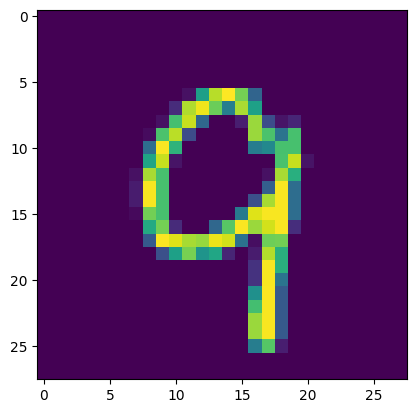

index:  1979 actual y:  9 predicted y:  9


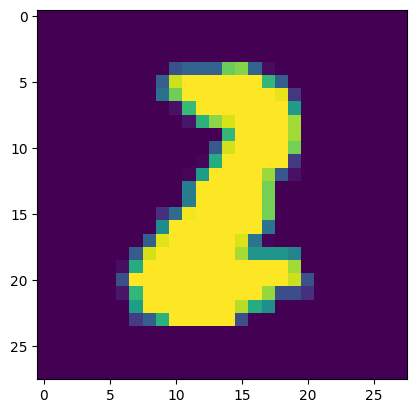

index:  1871 actual y:  2 predicted y:  2


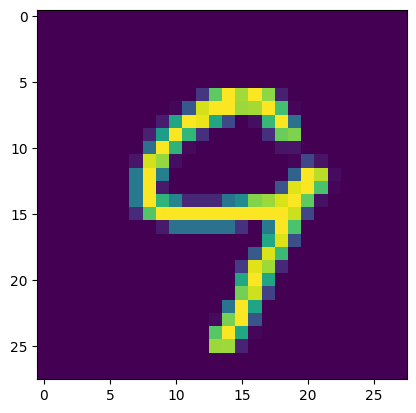

index:  1277 actual y:  9 predicted y:  9


In [9]:
import matplotlib.pyplot as plt
# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 3):
    random_index = random.randint(0, x_test.shape[0]-1)

    plt.imshow(x_test2[random_index]), plt.show()
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))



In [10]:
# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.2070 - accuracy: 0.9602
loss:  0.2070249319076538
accuracy 0.9602000117301941
